<a href="https://colab.research.google.com/github/riteshy7007/CNN-Projects/blob/main/GoldPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
Gold_Data = pd.read_csv('/content/gld_price_data.csv')

In [6]:
Gold_Data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
Gold_Data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
Gold_Data.shape


(2290, 6)

In [12]:
# checking the number of missing values
Gold_Data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [13]:
Gold_Data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
correlation = Gold_Data.corr()

ValueError: could not convert string to float: '1/2/2008'

In [16]:
# Convert the 'Date' column to datetime objects
Gold_Data['Date'] = pd.to_datetime(Gold_Data['Date'])

# Extract numerical features for correlation analysis
numerical_features = Gold_Data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
correlation = Gold_Data.corr()

<Axes: >

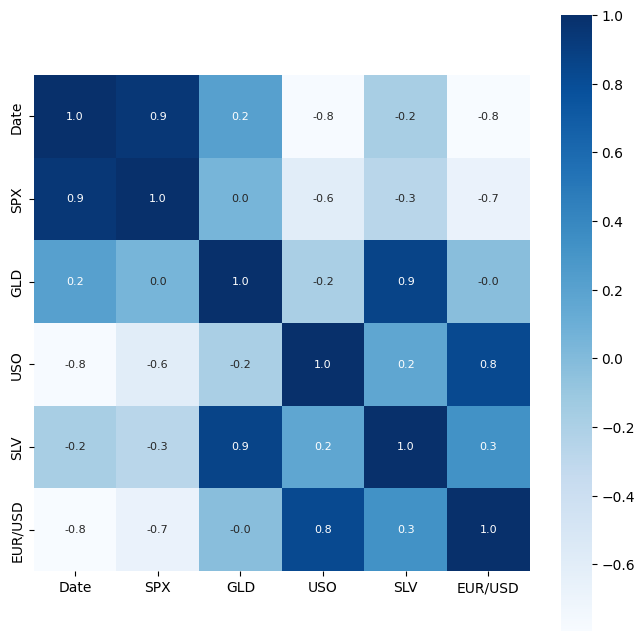

In [17]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [18]:
Gold_Data = Gold_Data.drop('Date', axis=1)

# Calculate the correlation matrix
correlation = Gold_Data.corr()

<Axes: >

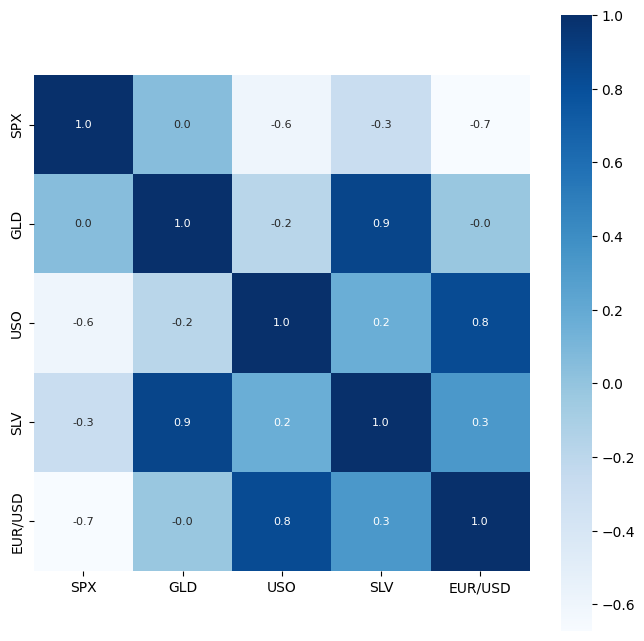

In [19]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-22-6f3eb52e2f58>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Gold_Data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

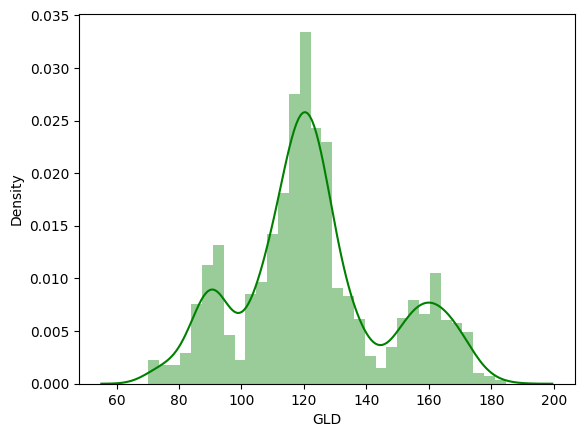

In [22]:
# checking the distribution of the GLD Price
sns.distplot(Gold_Data['GLD'],color='green')

In [24]:
X = Gold_Data.drop(['GLD'],axis=1)
Y = Gold_Data['GLD']

In [25]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [27]:
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [29]:
test_data_prediction = regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[168.53029897  81.71970004 116.07400029 127.58730106 120.74670141
 154.76969801 150.0778978  126.06220024 117.37959866 125.94550081
 116.58830112 171.93330093 141.14029881 167.80009867 115.26989982
 117.2350005  139.97960252 169.58590034 158.91150263 156.44379914
 155.11889995 125.22900014 176.37509959 157.12710388 125.16810031
  93.90579957  76.96610031 120.79740031 119.15009979 167.44129997
  88.17220059 125.11669967  91.11380059 117.6571001  121.12649894
 136.67750096 115.68900085 115.22700076 148.36389891 107.04210104
 104.57500238  87.28079808 126.51070067 117.95630009 153.85139939
 119.29110082 108.3059     108.0474983   93.27520089 127.1825975
  74.72520054 113.60899901 121.23849984 111.32159883 118.80849926
 120.5855993  158.53529976 168.25090102 147.13209669  85.90189869
  94.24820054  86.83049891  90.45869972 119.13860031 126.38220044
 127.48869998 169.4457998  122.24349945 117.24499887  98.74410004
 168.18690145 142.82659827 132.01610181 121.08580224 121.02169959
 119.752600

In [31]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9886570944309843


In [32]:
Y_test = list(Y_test)

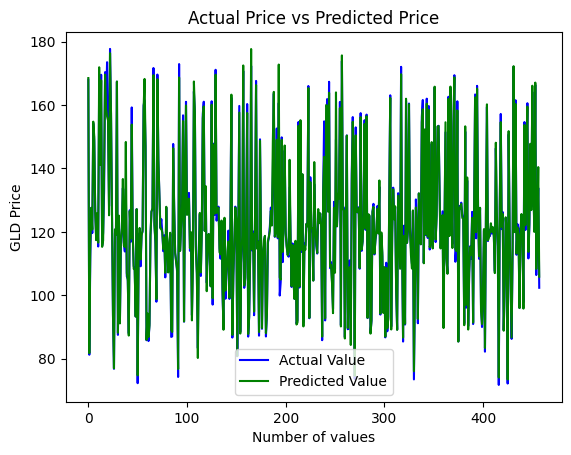

In [33]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()